In [1]:
import numpy as np

## Markcov Chains
Absolutely, here's a rundown on Markov chains:

* **Understanding the future based on the present:** A Markov chain is a mathematical tool used to predict the likelihood of future events based on the current state. Imagine a weather forecast - tomorrow's weather depends on today's weather, not necessarily on the weather conditions from days ago. That's the core idea behind Markov chains.

* **Markov property - memoryless transitions:**  A key feature of Markov chains is the Markov property. This basically states that the probability of moving to a new state depends only on the current state, and not on the history of how you got there. So, if it's raining today, the chance of sunshine tomorrow depends only on today's rainy weather, not whether it rained yesterday or the day before.

* **Applications:**  Markov chains find applications in various fields. For instance, they are used by search engines to suggest the most likely next word as you type, or in finance to model stock market fluctuations.  They are even used to create realistic-sounding artificial text!


### Marcov Chains in Linear Algebra 

Linear algebra plays a crucial role in analyzing and understanding Markov chains. Here's how:

**Transition Matrix:**

* A core concept in Markov chains is the transition matrix. This matrix captures the probabilities of moving from one state to another.  Each element (i,j) in the matrix represents the probability of transitioning from state i to state j.

* Linear algebra allows us to represent the transition probabilities of the entire system in a single matrix, making calculations and analysis much more efficient.

**Eigenvalues and Eigenvectors:**

* Eigenvalues and eigenvectors of the transition matrix hold valuable information about the long-term behavior of a Markov chain.

* In particular, analyzing the dominant eigenvalue (the one with the largest absolute value) and its corresponding eigenvector can reveal the existence and properties of a stationary distribution.

* A stationary distribution represents the long-term probabilities of being in each state.  This is useful for understanding the eventual behavior of the system after a long time.

**Other Applications:**

* Linear algebra is also used to study properties like periodicity (whether the chain cycles through states) and lumpability (collapsing groups of states that behave similarly).

* Advanced techniques from linear algebra can be used to analyze more complex Markov chain models, like hidden Markov models used in speech recognition.

Overall, linear algebra provides a powerful toolkit for manipulating and analyzing Markov chains. By representing transition probabilities as matrices and leveraging concepts like eigenvalues and eigenvectors, we can gain deep insights into the behavior of these probabilistic models.



## Queing Systems in Healthcare

Stochastic process - transitions between states. Increments with time have associated probabilities with transitions. Only one state occupation at a time. Discreate time or continious time markov chains are possible.

Down the chains are end states. Tranision matricies are denominated with time. 

The state of a Markcov chain can be described by a vector $\pi^{n}$, with $\pi_{j}^{n}$ is the probabiliy of being in state j at time n.

In [4]:
A=np.array([[0.9,0.07,0.02,0.01],[0,0.93,0.05,0.02],[0,0,0.85,0.15],[0,0,0,1]])
A

array([[0.9 , 0.07, 0.02, 0.01],
       [0.  , 0.93, 0.05, 0.02],
       [0.  , 0.  , 0.85, 0.15],
       [0.  , 0.  , 0.  , 1.  ]])

In [5]:
A.T

array([[0.9 , 0.  , 0.  , 0.  ],
       [0.07, 0.93, 0.  , 0.  ],
       [0.02, 0.05, 0.85, 0.  ],
       [0.01, 0.02, 0.15, 1.  ]])

In [12]:
#Ax=b
x=np.array([0.85,0.1,0.05,0.0])

pi=x*A
pi2=np.dot(x,A)
pi2

array([0.765 , 0.1525, 0.0645, 0.018 ])

In [13]:
A.T@x.T

array([0.765 , 0.1525, 0.0645, 0.018 ])

In [15]:

P=np.array([[6,5,3,1],[3,6,2,2],[3,4,3,1]])
S=np.array([[1.5,1],[2,2.5],[5,4.5],[16,17]])


In [20]:
P@S

array([[50. , 49. ],
       [58.5, 61. ],
       [43.5, 43.5]])

20x20 matricies, 0-255 for black and white, for colour three matricies are used in this format but for RBG.

Convolutional NN - anything related to images, but also in translation (faster than RNNs)

Tensors are just higher dimensional matricies.

## CNNs

In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

C:\Users\rswal\AppData\Local\Temp\ipykernel_90616\3151367801.py:8: DeprecationWarning: Please import `correlate` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import correlate, convolve
C:\Users\rswal\AppData\Local\Temp\ipykernel_90616\3151367801.py:8: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import correlate, convolve


In [44]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6))
    plt.imshow(im)

plt.gray()
plt.close()

## MNIST Data

MNIST dataset is loadded using sklearn dataset API. The MNIST dataset is loaded as a bunch object which is a container object exposing keys as attributes.

In [17]:
from sklearn.datasets import load_digits
mnist = load_digits()

In [18]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [38]:
mnist.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 1797\n:Number of Attributes: 64\n:Attribute Information: 8x8 image of integer pixels in the range 0..16.\n:Missing Attribute Values: None\n:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n:Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted in each bl

In [20]:
mnist['data'].shape, mnist['target'].shape

((1797, 64), (1797,))

In [22]:
8*8

64

In [23]:
images = np.reshape(mnist['data'], (1797, 8, 8))
labels = mnist['target'].astype(int)
n=len(images)
images.shape, labels.shape

((1797, 8, 8), (1797,))

In [25]:
images.min(), images.max()

(0.0000, 16.0000)

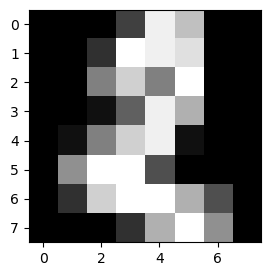

In [30]:
plt.imshow(images[2])

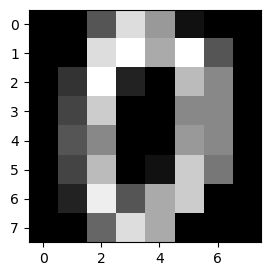

In [45]:
images=mnist.images
images=images/16 #normalizing
plot(images[0])

In [46]:
labels[0]

0

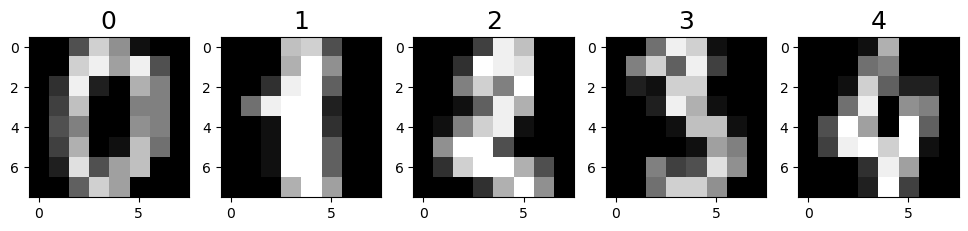

In [47]:
plots(images[:5], titles=labels[:5])

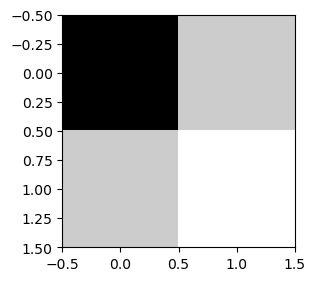

In [49]:
plot(images[0,0:2, 2:4]) #zoom

### Edge Detection

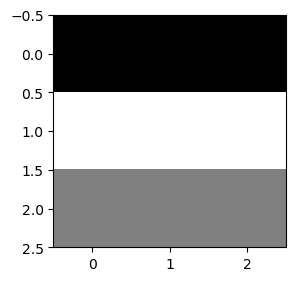

In [50]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [51]:
help(np.index_exp)

Help on IndexExpression in module numpy.lib.index_tricks object:

class IndexExpression(builtins.object)
 |  IndexExpression(maketuple)
 |  
 |  A nicer way to build up index tuples for arrays.
 |  
 |  .. note::
 |     Use one of the two predefined instances `index_exp` or `s_`
 |     rather than directly using `IndexExpression`.
 |  
 |  For any index combination, including slicing and axis insertion,
 |  ``a[indices]`` is the same as ``a[np.index_exp[indices]]`` for any
 |  array `a`. However, ``np.index_exp[indices]`` can be used anywhere
 |  in Python code and returns a tuple of slice objects that can be
 |  used in the construction of complex index expressions.
 |  
 |  Parameters
 |  ----------
 |  maketuple : bool
 |      If True, always returns a tuple.
 |  
 |  See Also
 |  --------
 |  index_exp : Predefined instance that always returns a tuple:
 |     `index_exp = IndexExpression(maketuple=True)`.
 |  s_ : Predefined instance without tuple conversion:
 |     `s_ = IndexExpr

In [57]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([], shape=(0, 5), dtype=float64)